In [1]:
import sys
sys.path.insert(0, '../utils')

from dataPiping import *

import numpy as np
import pandas as pd

import math

import datetime

from sklearn.linear_model import LinearRegression

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from sklearn.metrics import mean_squared_error
from math import exp, fabs, sqrt, log, pi
import random

In [6]:
import seaborn as sns

In [4]:
from scipy import stats

In [19]:
X, y = readAggrData()
# del X['recency']
X_train, X_test, y_train, y_test = splitAndNormaliseAggr(X,y)

(array([  4.43760000e+04,   9.24000000e+02,   1.83000000e+02,
          5.40000000e+01,   1.40000000e+01,   3.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  1.00000000e+00,   1.87900000e+02,   3.74800000e+02,
          5.61700000e+02,   7.48600000e+02,   9.35500000e+02,
          1.12240000e+03,   1.30930000e+03,   1.49620000e+03,
          1.68310000e+03,   1.87000000e+03]),
 <a list of 10 Patch objects>)

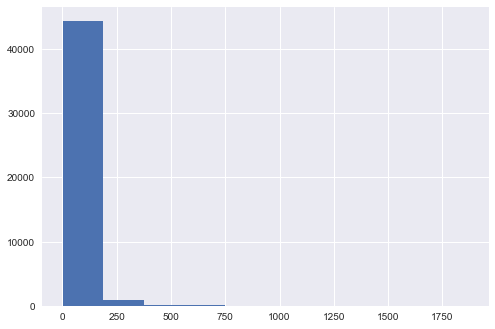

In [10]:
plt.hist(X.nSessions)

## Linear Regression Model

In [20]:
lr = LinearRegression()

In [21]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
rmse = sqrt(mean_squared_error(y_test, lr.predict(X_test)))

In [23]:
rmse

3120436.7454111264

In [24]:
str(datetime.timedelta(seconds=rmse))

'36 days, 2:47:16.745411'

In [25]:
str(datetime.timedelta(seconds=sqrt(mean_squared_error(y_train, lr.predict(X_train)))))

'35 days, 22:35:40.109973'

In [17]:
def pltBars(values, labels):
    fig = plt.figure(figsize=(20,5))
    plt.bar(range(len(values)), values)
    plt.xticks(range(len(values)), labels)

In [27]:
y_pred = lr.predict(X_test)

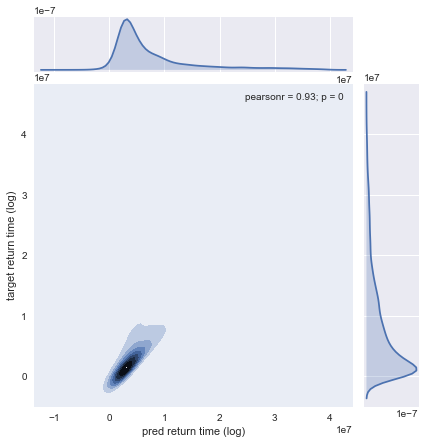

In [34]:
g = sns.jointplot(y_pred, y_test, kind="kde")
g.set_axis_labels("pred return time", "target return time")

C:\Users\georg\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


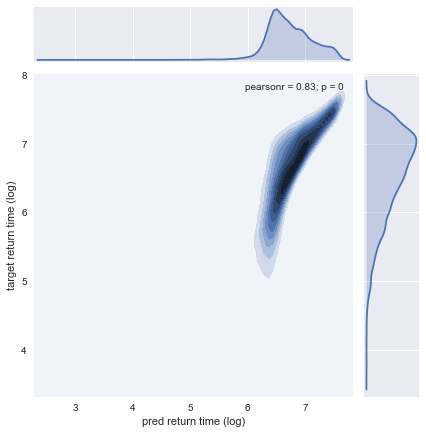

In [32]:
grid = sns.jointplot(np.log10(y_pred), np.log10(y_test), kind="kde")
grid.set_axis_labels("pred return time (log)", "target return time (log)")

In [1]:
3600*24

86400

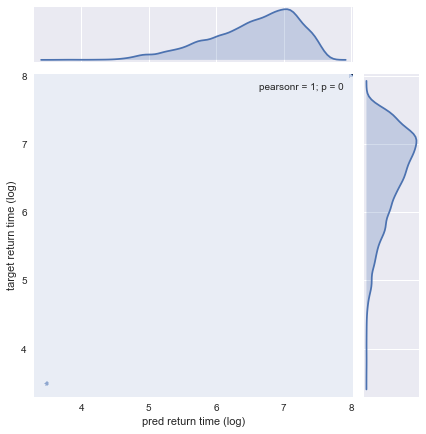

In [36]:
grid = sns.jointplot(np.log10(y_test + 1), np.log10(y_test), kind="kde")
grid.set_axis_labels("pred return time (log)", "target return time (log)")

## Avg Predictor

In [17]:
rmse_avg = sqrt(mean_squared_error(y_test, [np.average(y_train)]*len(y_test)))
# rmse_avg = sqrt(mean_squared_error(y_train, [np.average(y_train)]*len(y_train)))
str(datetime.timedelta(seconds=rmse_avg))

'96 days, 3:45:01.018388'

In [18]:
rmse_avg

8307901.018387657

In [19]:
stats.mode(y_train)

ModeResult(mode=array([ 178731.]), count=array([2]))

(array([     0.,      0.,      0.,      0.,      0.,  15034.,      0.,
             0.,      0.,      0.]),
 array([ 7727117.60179324,  7727117.70179324,  7727117.80179324,
         7727117.90179324,  7727118.00179324,  7727118.10179324,
         7727118.20179324,  7727118.30179324,  7727118.40179324,
         7727118.50179324,  7727118.60179324]),
 <a list of 10 Patch objects>)

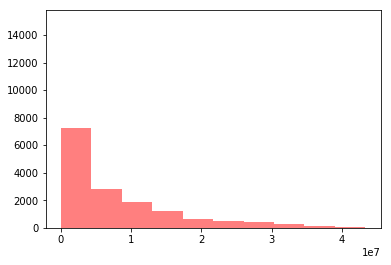

In [20]:
y_pred = [np.average(y_train)]*len(y_test)
plt.hist(y_test, alpha=0.5, color='r')
plt.hist(y_pred, alpha=.5, color='b')

(array([   35.,   113.,   243.,   407.,   499.,   648.,  1219.,  1863.,
         2785.,  7222.]),
 array([-35616813.89820676, -31282906.77987335, -26948999.66153994,
        -22615092.54320653, -18281185.42487312, -13947278.30653971,
         -9613371.18820629,  -5279464.06987288,   -945556.95153947,
          3388350.16679394,   7722257.28512735]),
 <a list of 10 Patch objects>)

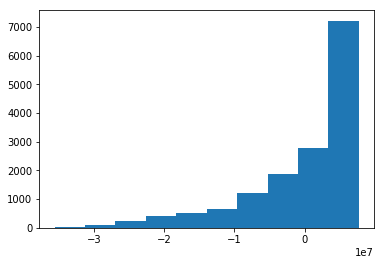

In [21]:
plt.hist(y_pred - y_test)